# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
type(X_train_full)

numpy.ndarray

Each pixel intensity is represented as a byte (0 to 255):

In [7]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

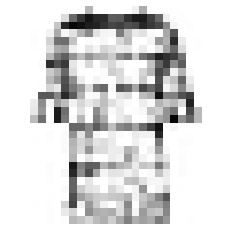

In [9]:
plt.imshow(X_train[10], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Here are the corresponding class names:

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [13]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [14]:
X_valid.shape

(5000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

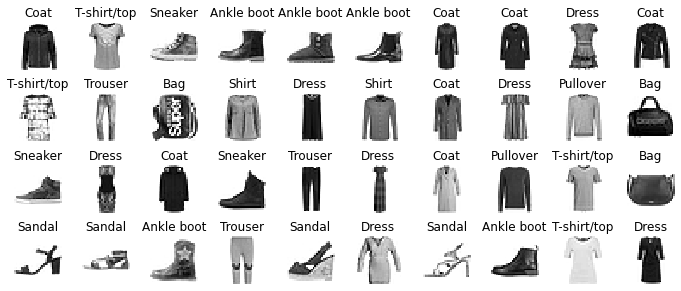

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.layers

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [23]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [24]:
model.get_layer(hidden1.name) is hidden1

True

In [25]:
weights, biases = hidden1.get_weights()

In [26]:
weights

array([[-6.2503919e-02,  1.1342913e-02,  7.2103947e-02, ...,
         6.7562133e-02,  5.1189959e-04, -3.8644664e-02],
       [-5.8088303e-03,  4.5235075e-02, -5.1371910e-02, ...,
        -3.1967834e-03, -1.1612251e-03, -1.6565986e-02],
       [-5.6443818e-02, -4.3098144e-02, -1.0039948e-02, ...,
        -3.1743184e-02, -6.2549174e-02,  4.0467530e-03],
       ...,
       [ 1.8499412e-02, -3.8295984e-06,  3.6165088e-02, ...,
        -4.5405820e-02, -5.5304840e-03,  3.5329759e-03],
       [-5.7787850e-02,  6.5984085e-02, -2.5965720e-03, ...,
        -2.5154654e-02,  4.0465310e-02, -5.2522510e-02],
       [-5.1760741e-02,  6.2623382e-02, -4.5975521e-02, ...,
        -7.0454739e-02, -2.0861935e-02,  3.0908652e-02]], dtype=float32)

In [27]:
weights.shape

(784, 300)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [31]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7150 - accuracy: 0.7662 - val_loss: 0.5631 - val_accuracy: 0.7912
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4900 - accuracy: 0.8294 - val_loss: 0.4599 - val_accuracy: 0.8398
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4454 - accuracy: 0.8438 - val_loss: 0.4216 - val_accuracy: 0.8532
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4185 - accuracy: 0.8528 - val_loss: 0.3980 - val_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3985 - accuracy: 0.8601 - val_loss: 0.3841 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3827 - accuracy: 0.8653 - val_loss: 0.3760 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3681 - accuracy: 0.8698 - val_loss: 0.3836 - val_accuracy:

In [32]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [33]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

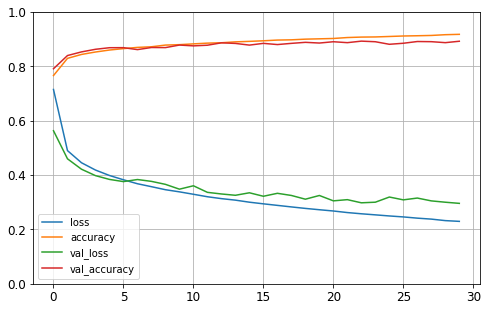

In [35]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.8854


[0.33024877309799194, 0.8853999972343445]

In [37]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [38]:
X_new.shape

(3, 28, 28)

In [39]:
y_pred = model.predict(X_new)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1])

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

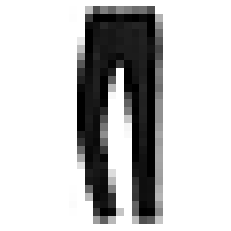

In [41]:
plt.imshow(X_new[2], cmap="binary")
plt.axis('off')
plt.show()

In [42]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

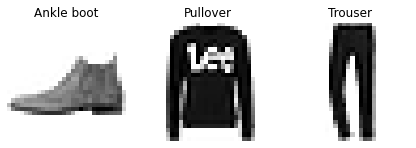

In [43]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

## 1) Plot Learning curves when using different optimizers

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7121 - accuracy: 0.7673 - val_loss: 0.5085 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4854 - accuracy: 0.8317 - val_loss: 0.4394 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4415 - accuracy: 0.8459 - val_loss: 0.4471 - val_accuracy: 0.8430
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4152 - accuracy: 0.8552 - val_loss: 0.3981 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3939 - accuracy: 0.8625 - val_loss: 0.3750 - val_accuracy: 0.8728
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3776 - accuracy: 0.8671 - val_loss: 0.3800 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3639 - accuracy: 0.8707 - val_loss: 0.3647 - val_accuracy:

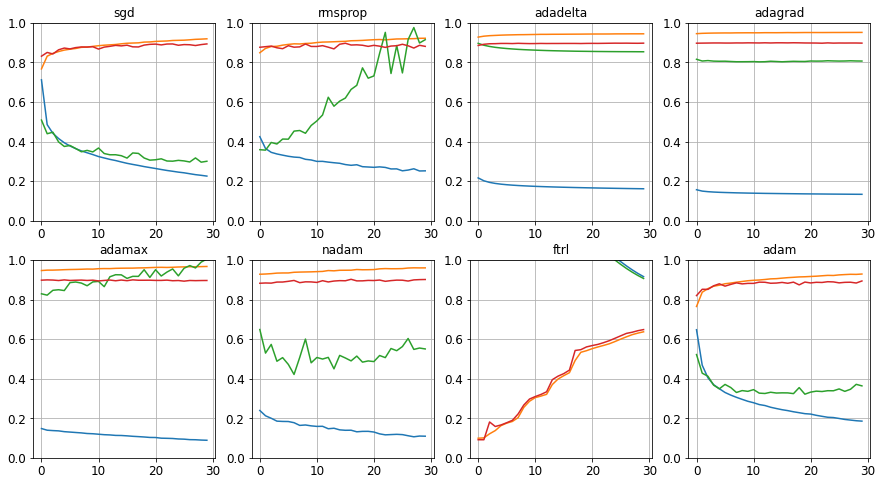

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
  ])
plt.figure(figsize = (15,8))
optimisers = ["sgd", "rmsprop", "adadelta", "adagrad",
              "adamax", "nadam", "ftrl", "adam"]

for i in range(len(optimisers)):
  plt.subplot(2, 4, i+1)
  model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimisers[i],
              metrics=["accuracy"])
  history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid, verbose=0)
  plt.plot(pd.DataFrame(history.history))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.title(optimisers[i])
plt.show()

## 2) Plot Learning curves when using different batch sizes

Epoch 1/30
3667/3667 [==============================] - 13s 3ms/step - loss: 0.6246 - accuracy: 0.7869 - val_loss: 0.4963 - val_accuracy: 0.8204
Epoch 2/30
3667/3667 [==============================] - 12s 3ms/step - loss: 0.4424 - accuracy: 0.8440 - val_loss: 0.3935 - val_accuracy: 0.8638
Epoch 3/30
3667/3667 [==============================] - 12s 3ms/step - loss: 0.3982 - accuracy: 0.8570 - val_loss: 0.3723 - val_accuracy: 0.8714
Epoch 4/30
3667/3667 [==============================] - 12s 3ms/step - loss: 0.3716 - accuracy: 0.8673 - val_loss: 0.3608 - val_accuracy: 0.8750
Epoch 5/30
3667/3667 [==============================] - 12s 3ms/step - loss: 0.3510 - accuracy: 0.8732 - val_loss: 0.3730 - val_accuracy: 0.8662
Epoch 6/30
3667/3667 [==============================] - 12s 3ms/step - loss: 0.3351 - accuracy: 0.8777 - val_loss: 0.3394 - val_accuracy: 0.8784
Epoch 7/30
3667/3667 [==============================] - 12s 3ms/step - loss: 0.3216 - accuracy: 0.8827 - val_loss: 0.3259 - val_ac

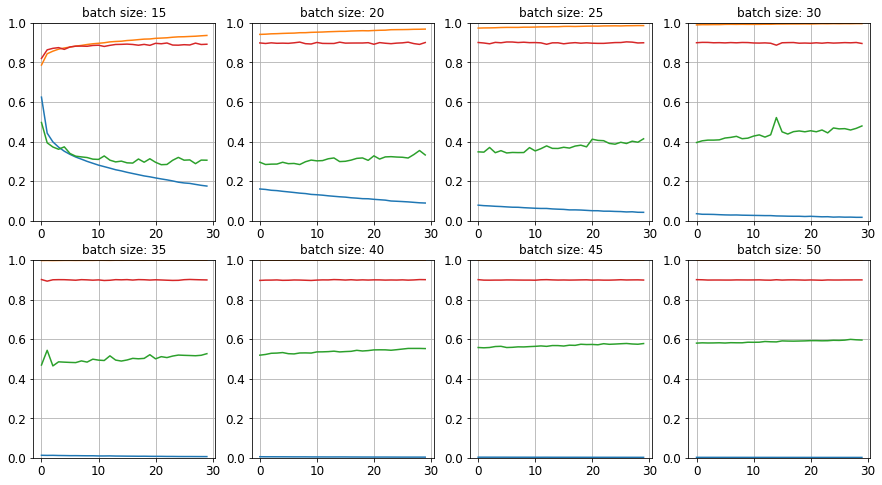

In [45]:
plt.figure(figsize = (15,8))
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
for i in range(8):
  plt.subplot(2, 4, i+1)
  history = model.fit(X_train, y_train, batch_size=15+5*i, epochs=30,
                    validation_data=(X_valid, y_valid), verbose=0)
  plt.plot(pd.DataFrame(history.history))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.title("batch size: "+str(15+5*i))
plt.show()

## 3) Plot Learning curves when using different number of epochs

Epoch 1/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7100 - accuracy: 0.7668 - val_loss: 0.5148 - val_accuracy: 0.8210
Epoch 2/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4897 - accuracy: 0.8287 - val_loss: 0.4460 - val_accuracy: 0.8458
Epoch 3/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4465 - accuracy: 0.8432 - val_loss: 0.4650 - val_accuracy: 0.8306
Epoch 4/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4186 - accuracy: 0.8524 - val_loss: 0.4139 - val_accuracy: 0.8548
Epoch 5/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3987 - accuracy: 0.8600 - val_loss: 0.4025 - val_accuracy: 0.8610
Epoch 6/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3816 - accuracy: 0.8650 - val_loss: 0.3706 - val_accuracy: 0.8752
Epoch 7/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3678 - accuracy: 0.8707 - val_loss: 0.3584 - val_accuracy:

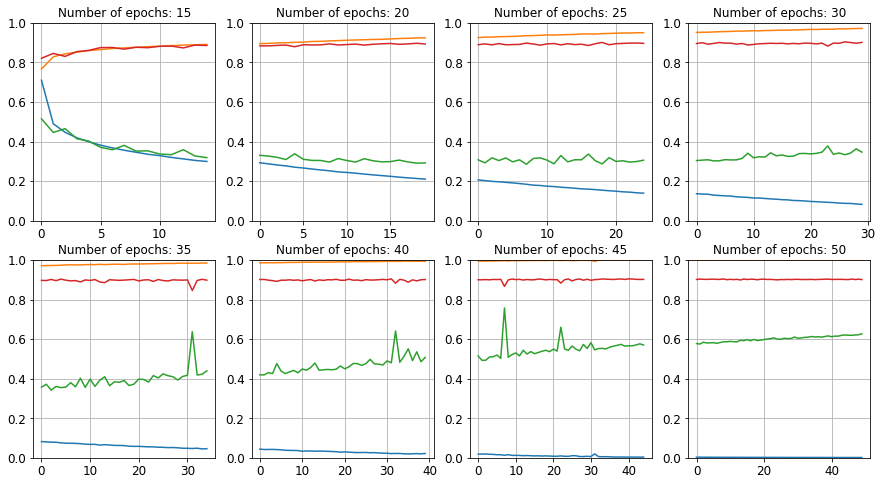

In [46]:
plt.figure(figsize = (15,8))
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
for i in range(8):
  plt.subplot(2, 4, i+1)
  history = model.fit(X_train, y_train, batch_size=32, epochs=15+5*i,
                    validation_data=(X_valid, y_valid), verbose=0)
  plt.plot(pd.DataFrame(history.history))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.title("Number of epochs: "+str(15+5*i))
plt.show()

## 4) Add additional neurons and use Dropout Layer. Plot Learning curves.

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7050 - accuracy: 0.7683 - val_loss: 0.5178 - val_accuracy: 0.8192
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4848 - accuracy: 0.8308 - val_loss: 0.4447 - val_accuracy: 0.8494
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4404 - accuracy: 0.8469 - val_loss: 0.4054 - val_accuracy: 0.8636
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4126 - accuracy: 0.8573 - val_loss: 0.3959 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3933 - accuracy: 0.8617 - val_loss: 0.3969 - val_accuracy: 0.8628
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3767 - accuracy: 0.8665 - val_loss: 0.3811 - val_accuracy: 0.8704
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3631 - accuracy: 0.8717 - val_loss: 0.3630 - val_accuracy:

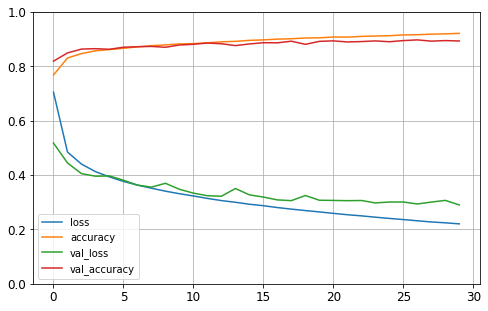

In [50]:
model = keras.models.Sequential([
                                 
    #keras.layers.Dropout(0.01, input_shape=[28, 28]),

    #with 400 neurons in the first layer instead of 300
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
  ])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                validation_data=(X_valid, y_valid), verbose=0)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 5) Use Batch Normalisation

Epoch 1/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4528 - accuracy: 0.8359 - val_loss: 0.3656 - val_accuracy: 0.8678
Epoch 2/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3384 - accuracy: 0.8750 - val_loss: 0.3442 - val_accuracy: 0.8722
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2983 - accuracy: 0.8885 - val_loss: 0.3203 - val_accuracy: 0.8822
Epoch 4/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2700 - accuracy: 0.8994 - val_loss: 0.3088 - val_accuracy: 0.8920
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2499 - accuracy: 0.9053 - val_loss: 0.3376 - val_accuracy: 0.8812
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2306 - accuracy: 0.9128 - val_loss: 0.3065 - val_accuracy: 0.8922
Epoch 7/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2168 - accuracy: 0.9183 - val_loss: 0.3210 - val_ac

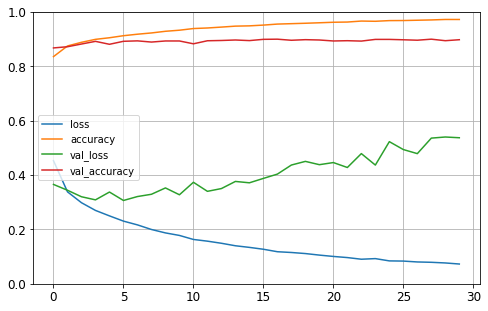

In [48]:
model = keras.models.Sequential([
                                 
    tf.keras.layers.BatchNormalization(
      axis=-1,
      momentum=0.99,
      epsilon=0.001,
      center=True,
      scale=True,
      beta_initializer="zeros",
      gamma_initializer="ones",
      moving_mean_initializer="zeros",
      moving_variance_initializer="ones",
      beta_regularizer=None,
      gamma_regularizer=None,
      beta_constraint=None,
      gamma_constraint=None),

    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
            optimizer=optimisers[i],
            metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                validation_data=(X_valid, y_valid), verbose=0)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 6) repeat with more layers

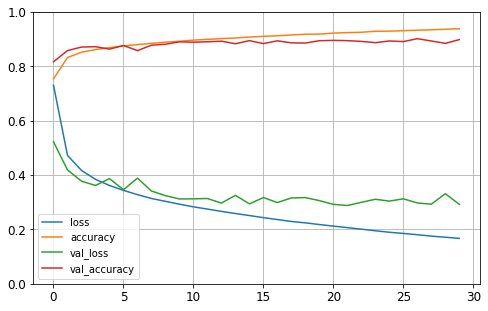

In [59]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
  ])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                validation_data=(X_valid, y_valid), verbose=0)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 7) apply on different datasets

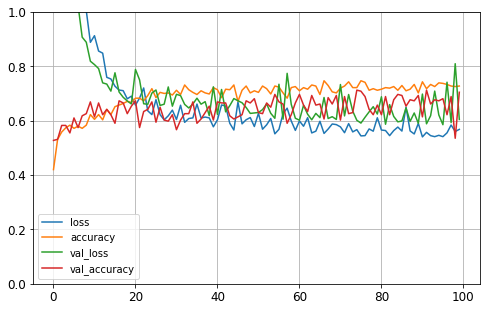

In [58]:
dataset = np.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

model = keras.models.Sequential()
model.add(keras.layers.Dense(12, input_dim=8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10, verbose=0)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()